<a href="https://colab.research.google.com/github/AlbaNMartinez/AlbaNMartinez/blob/main/Projet1_Population_Descriptif.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


● **population.csv ** : Informations démographiques par ville, âge, sexe et mode de vie
NIVGEO : geographic level (arrondissement, communes…)
CODGEO : unique code for the town
LIBGEO : name of the town
MOCO : mode de cohabitation :
■	11 = enfants vivant avec deux parents
■	12 = enfants vivant avec un seul parent
■	21 = adultes vivant en couple sans enfant
■	22 = adultes vivant en couple avec enfants
■	23 = adultes vivant seuls avec enfants
■	31 = personnes étrangères à la famille vivant au foyer
■	32 = personnes vivant seulesAGE80_17 : catégorie d'âge (tranche de 5 ans) | ex : 0 -> personnes âgées de 0 à 4 ans
SEXE : sexe, 1 pour homme | 2 pour femme
NB : Nombre de personnes dans la catégorie



## Analyse du dataset "Population"

Les unité d'analyse des données est la commune, raison pour laquelle apparait la colonne NIVGEO = COM pour toutes les observations






In [2]:
# Informations démographiques par ville, âge, sexe et mode de vie NIVGEO 
population = pd.read_csv ('population.csv')
population.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
0,COM,1001,L'Abergement-Clémenciat,11,0,1,15
1,COM,1001,L'Abergement-Clémenciat,11,0,2,15
2,COM,1001,L'Abergement-Clémenciat,11,5,1,20
3,COM,1001,L'Abergement-Clémenciat,11,5,2,20
4,COM,1001,L'Abergement-Clémenciat,11,10,1,20


In [3]:
population.info()
'''
NIVGEO : geographic level (arrondissement, communes…) 
CODGEO : unique code for the town 
LIBGEO : name of the town 
MOCO : mode de cohabitation : 
 11 = enfants vivant avec deux parents 
 12 = enfants vivant avec un seul parent 
 21 = adultes vivant en couple sans enfant 
 22 = adultes vivant en couple avec enfants 
 23 = adultes vivant seuls avec enfants 
 31 = personnes étrangères à la famille vivant au foyer 
 32 = personnes vivant seules
AGE80_17 : catégorie d'âge (tranche de 5 ans) | ex : 0 -> personnes âgées de 0 à 4 ans
SEXE : sexe, 1 pour homme | 2 pour femme 
NB : Nombre de personnes dans la catégorie
'''


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8536584 entries, 0 to 8536583
Data columns (total 7 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   NIVGEO     object
 1   CODGEO     object
 2   LIBGEO     object
 3   MOCO       int64 
 4   AGEQ80_17  int64 
 5   SEXE       int64 
 6   NB         int64 
dtypes: int64(4), object(3)
memory usage: 455.9+ MB


"\nNIVGEO : geographic level (arrondissement, communes…) \nCODGEO : unique code for the town \nLIBGEO : name of the town \nMOCO : mode de cohabitation : \n 11 = enfants vivant avec deux parents \n 12 = enfants vivant avec un seul parent \n 21 = adultes vivant en couple sans enfant \n 22 = adultes vivant en couple avec enfants \n 23 = adultes vivant seuls avec enfants \n 31 = personnes étrangères à la famille vivant au foyer \n 32 = personnes vivant seules\nAGE80_17 : catégorie d'âge (tranche de 5 ans) | ex : 0 -> personnes âgées de 0 à 4 ans\nSEXE : sexe, 1 pour homme | 2 pour femme \nNB : Nombre de personnes dans la catégorie\n"

L'ensemble de données compte avec 817084 observations. L'architecture de la base est:
---
Par commune


> Selon mode de cohabitation

>> l'age

>>> et le sexe

on observe le total de population



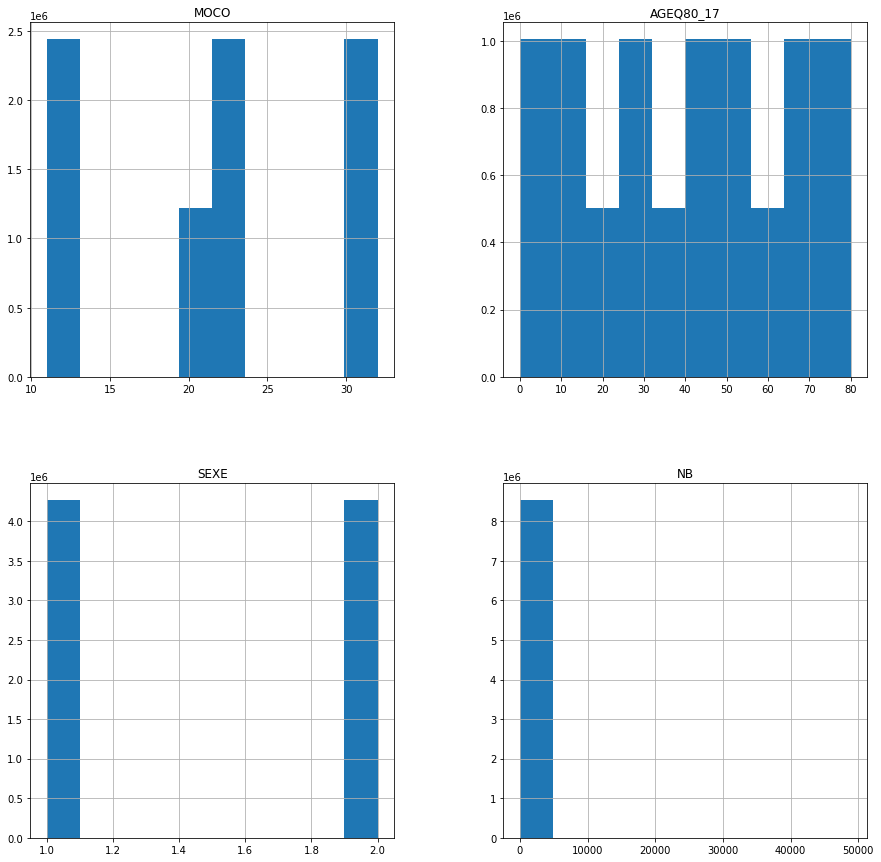

In [4]:
## Premiere revision a l aide d histogrammes

population.hist(figsize=(15,15))
plt.show()

In [5]:
# La variable Niveau Geographique NIVGEO ne change pas 
population['NIVGEO'].unique()

array(['COM'], dtype=object)

In [6]:
#La deuxieme colonne, le code de la Commune CODGEO servira pour assembler les données si necessaire. 
# En effet, on observe les données de 3,434 communes , il ne s'agit pas de toutes les communes en France, car le pays compte avec pres de 31327 (INSEE, 2018)
# probablement sont les communes avec plus de population, on verra apres.

population['CODGEO'].value_counts()

29169    238
33387    238
33393    238
33392    238
33391    238
        ... 
1001     238
30320    196
28267    174
28267     64
30320     42
Name: CODGEO, Length: 35870, dtype: int64

In [7]:
population['CODGEO'].unique().shape

(35870,)

In [8]:
# Pour ce qui est de l'age, la base est organisée en tranches d'age, dans ce colonne on trouve des valeurs manquantes nan
# il y 1 valeur manquante
population['AGEQ80_17'].unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80])

In [9]:
population['AGEQ80_17'].value_counts()

80    502152
35    502152
5     502152
10    502152
15    502152
20    502152
25    502152
30    502152
40    502152
75    502152
45    502152
50    502152
55    502152
60    502152
65    502152
70    502152
0     502152
Name: AGEQ80_17, dtype: int64

In [10]:
population['AGEQ80_17'].isna().sum()

0

In [11]:
population.loc[population['AGEQ80_17'].isna()]

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB


In [12]:
# la valeur manquante correspon a la ligne 817083, qui n'a aucune valeur, pourtant on pourrait enlever cette ligne
# On cree une nouvelle base qui garde tous les changements?

In [13]:
# La Variable MOCO compte avec 7 categories et aussi la valeur manquante pour la ligne 817083
population['MOCO'].unique()

array([11, 12, 21, 22, 23, 31, 32])

In [14]:
# La Variable sexe a deux possibilités 1 pour homme | 2 pour femme  et aussi la valeur manquante pour la ligne 817083
population['SEXE'].unique()

array([1, 2])

In [15]:
# La Variable NB est la seule variable numerique de la base, qui detaille la quantité de population dans la commune pour chaque clasiffication 
population['NB'].describe()

count    8.536584e+06
mean     7.446743e+00
std      1.010993e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.000000e+00
max      4.887300e+04
Name: NB, dtype: float64

In [16]:
# En fait quand on regarde les valeurs, il apparaissent beaucoup de 0, car ce sont des classifications pour las quelles la commune ne compte pas de population, notamment 
# dans le range des enfants avec un age supérieure a 18 
population['NB'].value_counts()

0       6325631
4        440357
5        358493
3        143014
10       135823
         ...   
2438          1
2441          1
2445          1
2447          1
8164          1
Name: NB, Length: 2953, dtype: int64

In [17]:
population.loc[population['NB']==0]

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
9,COM,1001,L'Abergement-Clémenciat,11,20,2,0
12,COM,1001,L'Abergement-Clémenciat,11,30,1,0
13,COM,1001,L'Abergement-Clémenciat,11,30,2,0
14,COM,1001,L'Abergement-Clémenciat,11,35,1,0
15,COM,1001,L'Abergement-Clémenciat,11,35,2,0
...,...,...,...,...,...,...,...
8536558,COM,97424,Cilaos,32,20,1,0
8536563,COM,97424,Cilaos,32,30,2,0
8536565,COM,97424,Cilaos,32,35,2,0
8536567,COM,97424,Cilaos,32,40,2,0


# MODIFICATIONS SUGGÉREES A LA BASE

1. Enlever les valeurs manquantes 

population = population.dropna (axis =0, how ='any')

2. Si l'on veut croisser la basse de population avec la base des salaires ou des entreprises, ce n'est pas d'interes de garder les categories des enfants.
On pourrait les enlever.

3. De meme, pour les adultes, étant donné qu'on s 'interesse aux salaires, on pourrait limiter a l'age productive. 

4. Comme la variable a travailler sera le nombre de population, on pourrait l'enlever pour totaliser (ou pas). ceci diminue ostensiblement la base et allege les procedures.

In [18]:
#Enlever les NA
population = population.dropna (axis =0, how ='any')



In [19]:
# enlever categories renseignant enfants et étrangers présents dans le foyer

population['MOCO'] =  population['MOCO'].astype(int)
population = population[(population['MOCO']!= 11.0) & (population['MOCO']!= 12) & (population['MOCO']!= 31)]
population.shape
# On a enlevé 116723 observations

(4878048, 7)

In [20]:
# Enlever cateories d age superieures a 70 ans (au cas ou on voudrais regarder les senior...)
population['AGEQ80_17'] =  population['AGEQ80_17'].astype(int)
population = population[(population['AGEQ80_17']>= 20) & (population['AGEQ80_17']<= 70) ]
# On a enleve 171658 observations

In [21]:
# On 
population['MOCO'].value_counts()

32    789096
23    789096
22    789096
21    789096
Name: MOCO, dtype: int64

In [26]:
# Enlever les lignes que ne compent pas des populations avec les caracteristiques
population['NB'] =  population['NB'].astype(int)
population = population[(population['NB']!= 0) ]

In [23]:
population.head()

,NIVGEO,CODGEO,LIBGEO,MOCO,AGEQ80_17,SEXE,NB
79,COM,1001,L'Abergement-Clémenciat,21,25,2,10
80,COM,1001,L'Abergement-Clémenciat,21,30,1,10
84,COM,1001,L'Abergement-Clémenciat,21,40,1,5
86,COM,1001,L'Abergement-Clémenciat,21,45,1,5
87,COM,1001,L'Abergement-Clémenciat,21,45,2,10


In [24]:
population.shape

(1286782, 7)

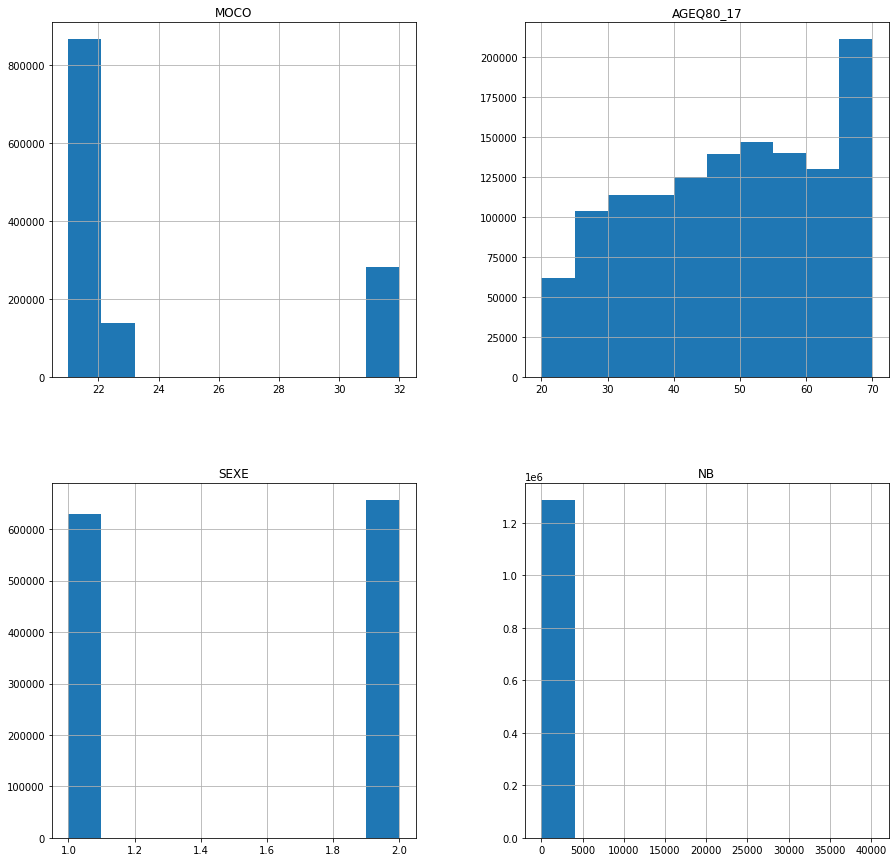

In [27]:

population.hist(figsize=(15,15))
plt.show()

In [31]:
population['NB'] =  population['NB'].astype(int)
population['NB'].describe()

count    1.286782e+06
mean     2.914517e+01
std      1.971430e+02
min      1.000000e+00
25%      4.000000e+00
50%      9.000000e+00
75%      2.000000e+01
max      4.014700e+04
Name: NB, dtype: float64